In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("housingData-Real.csv")

In [5]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
## Square ft living Vs Price in this Linear Regression.
## Create your columns

living_space = df["sqft_living"]
price = df["price"]

In [10]:
# Convert into 2D matrices X & Y (Independent & Dependent Variable) inorder to perform ML operations

X = np.array(living_space).reshape(-1,1)
X

## ERROR AT REGRESSION Model if not used reshape(-1,1)
##ValueError: Expected 2D array, got 1D array instead:
## X : array=[2110 4490 1480 ... 1900 1800 1300].
##  Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [11]:
Y = np.array(price)
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [15]:
# Convert data into test & training

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33)

X_test

array([[1600],
       [2980],
       [1020],
       ...,
       [1820],
       [1110],
       [1010]], dtype=int64)

In [16]:
##Pass the data into linear regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [17]:
## Create Predictor

predictor = regressor.predict(X_test)

In [18]:
predictor

array([404975.9336984 , 793383.51095676, 241732.16934344, ...,
       466895.98224684, 267063.09829507, 238917.62168214])

Text(0, 0.5, 'Price of house')

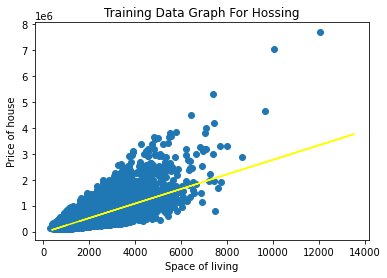

In [19]:
# Showing Results Graph & plot.

# For Training Datasets.

plt.scatter(X_train,Y_train)
plt.plot(X_test,regressor.predict(X_test),color='Yellow')
plt.title("Training Data Graph For Hossing")
plt.xlabel("Space of living")
plt.ylabel("Price of house")


Text(0, 0.5, 'Price of house')

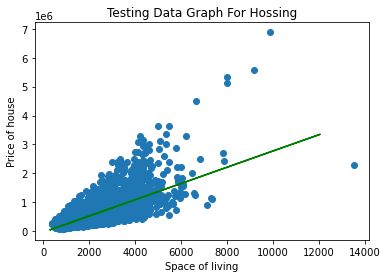

In [20]:
# Showing Prediction Results on Graph or plot.

# For Testing Datasets.

plt.scatter(X_test,Y_test)
plt.plot(X_train,regressor.predict(X_train), color = 'green')
plt.title("Testing Data Graph For Hossing")
plt.xlabel("Space of living")
plt.ylabel("Price of house")

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictor))
print('MSE:', metrics.mean_squared_error(Y_test, predictor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictor)))


MAE: 174095.09042747904
MSE: 70392869386.90616
RMSE: 265316.54563352466


# Insights:

1. Sudden increase in prices on higer side when space of living is more than 7000 sqft.   
2. Need of improvement in the model as error is high.